# Analysis ver2

This is a derived and cleaned up version of Analysis_ver1, with better pipelines for the data.

In [9]:
%matplotlib inline

In [10]:
cd /home/tobiszuts/insight/project

/media/tobiszuts/Windows/Data/Work/Insight/project


# Data cleaning

Get the data and start processing.

In [11]:
import pickle
file_load = "Reddit_depression.p"
results = pickle.load( open(file_load, 'rb'))

In [12]:
import pandas as pd

data = pd.DataFrame(results)
extract_keys = ['id', 'author', 'score', 'num_comments', 'downs', 'ups', 
                'created_utc', 'title', 'selftext']

data = data[sorted(extract_keys)]
data.head()

,author,created_utc,downs,id,num_comments,score,selftext,title,ups
0,throwaway67640,1.392387e+09,0,1xwb9u,0,1,"I can't think straight, I can't concentrate, I...",I feel like my brain doesn't work anymore.,1
1,Tommy405,1.392387e+09,0,1xwaio,0,1,There is this amazing girl that i've known sin...,She's the girl i was always looking for... But...,1
2,periwinkle8,1.392387e+09,0,1xwah3,1,1,I've been struggling with depression since hig...,I don't have anyone and I don't know why,1
3,crazy_raconteur,1.392384e+09,0,1xw6ra,0,1,i burn myself..... i heat up a knife and hold ...,how often do you guys inflict self harm?,1
4,ikon106,1.392381e+09,0,1xw4bo,0,1,I’m scared\n Of myself\n ...,All I do is hide,1


## Feature engineering and exploring!

Start with looking at authors: how many unique ones?  How many posts did each write?

In [13]:
data.describe()

,created_utc,downs,num_comments,score,ups
count,9.052100e+04,90521.000000,90521.000000,90521.000000,90521.000000
mean,1.357906e+09,1.787265,5.212735,8.327327,10.096420
std,2.623390e+07,6.615052,11.971002,34.528445,40.569957
min,1.230773e+09,-1.000000,0.000000,0.000000,0.000000
25%,1.342805e+09,0.000000,1.000000,1.000000,2.000000
50%,1.362861e+09,1.000000,2.000000,2.000000,3.000000
75%,1.379015e+09,2.000000,6.000000,6.000000,7.000000
max,1.392387e+09,547.000000,985.000000,1459.000000,1938.000000


In [14]:
len(data.author.unique())

42952

In [15]:
len(data)

90521

[deleted]     26506
HHSOCCER28       96
extruder         74
Name: author, dtype: int64


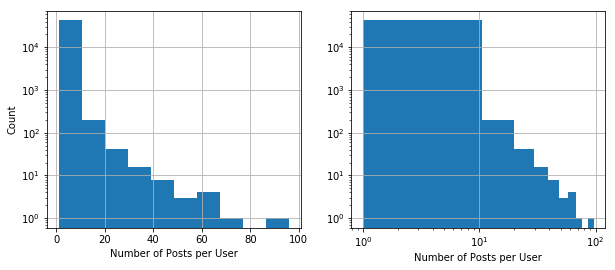

In [16]:
import matplotlib.pyplot as plt

print(data.author.value_counts()[:3])

fig, axes = plt.subplots(1, 2, figsize = (10,4))
data.author.value_counts()[1:].hist(ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('Number of Posts per User')
axes[0].set_ylabel('Count')

data.author.value_counts()[1:].hist(ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Posts per User')


This is a power law, as expected.

In [17]:
dates = pd.to_datetime(data.created_utc, unit="s")
data.created = dates
dates.describe()

count                   90521
unique                  90453
top       2013-04-01 05:40:39
freq                        2
first     2009-01-01 01:23:22
last      2014-02-14 14:17:07
Name: created_utc, dtype: object

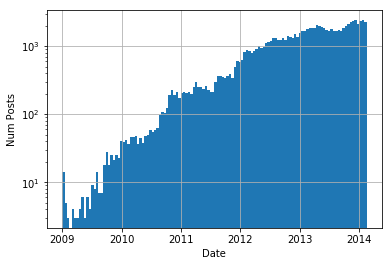

In [18]:
plt.subplots(1,1, figsize = (6,4))
data.created.hist(bins=126)  # two bins per month
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Num Posts')

In [19]:
sum(data.created.dt.year<2011)/len(data)

0.027187061565824504

That is, only 3% of the posts are from 2009 or 2010.  Probably best to filter these out, since the community is still growing quickkly and might have very different characteristics than later on.

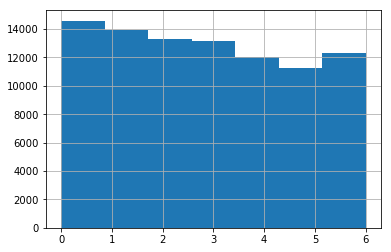

In [20]:
dates.dt.dayofweek.hist(bins=7)

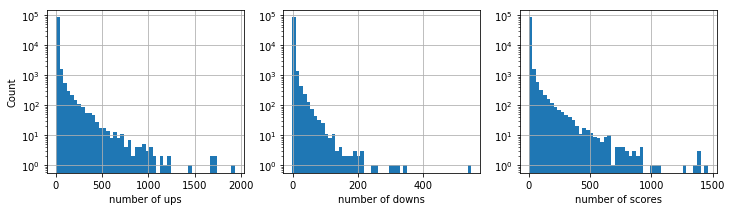

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

data.ups.hist(ax = axes[0], bins=50)
axes[0].set_yscale('log')
axes[0].set_xlabel('number of ups')
axes[0].set_ylabel('Count')
plt.yscale('log')

data.downs.hist(ax = axes[1], bins=50)
axes[1].set_yscale('log')
axes[1].set_xlabel('number of downs')
#axes[1].set_xlim([0, 2000])

data.score.hist(ax = axes[2], bins=50)
axes[2].set_yscale('log')
axes[2].set_xlabel('number of scores')


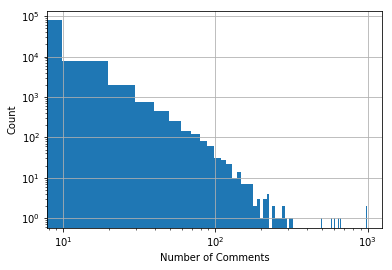

In [22]:
data.num_comments.hist(bins=100, figsize=(6,4))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Number of Comments')

In [23]:
print('Number of commentless posts = {}\nNumber of posts with 7+ comments = {}'.format(
    len(data[data.num_comments==0]), len(data[data.num_comments>=7])))

Number of commentless posts = 17364
Number of posts with 7+ comments = 19326


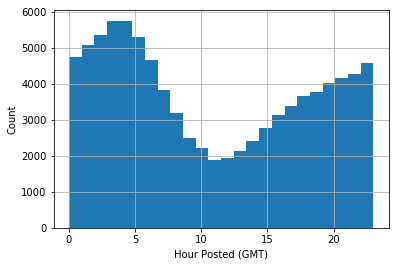

In [24]:
dates.dt.hour.hist(bins=24, figsize=(6,4))
plt.xlabel('Hour Posted (GMT)')
plt.ylabel('Count')

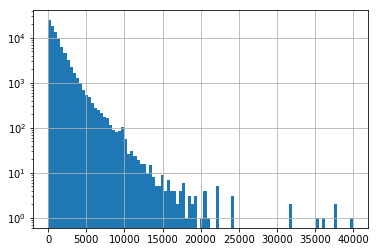

In [25]:
data.post_len = data.selftext.apply(lambda x: len(x))
data.post_len.hist(bins=100)
plt.yscale('log')

In [26]:
print(data.selftext[1])
data.selftext[1].count('?')

There is this amazing girl that i've known since 2012. She was the girl I was looking for. She's very  athletic, smart, beautiful, kind, adventurous, and funny. I love her, i miss her within 10 seconds, and if I do not see her, I feel like my whole day is waste. I tried everything to make her love me back, but no such luck. Part of me wants to get rid of this already, those painful nights because I think of her, and I can't stop it.
It's so painful... I feel desperate. She is my first love, And they say its hard killing the feeling of first love. What do I do? Im just a guy who has the gift of writing essays, semi-handsome, kind, and smart. I want her so bad. Should I Try to make her lover back? If so, how? Or do I need to move on? If I should, how can I do it? Please help me...


5

In [27]:
import string
"Ain't this a test....oder?".count('?')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def PreProcessData(raw_data, extract_keys) :
    """ This processes the post data, and can be used as 
    a template for the upload data.
    """
    import pandas as pd
    
    data_raw = pd.DataFrame(raw_data)
    data = data_raw[sorted(extract_keys)].copy()
        
    dates = pd.to_datetime(data.created_utc, unit="s")
    data['created_dayofweek'] = dates.dt.dayofweek
    data['created_hour'] = dates.dt.hour
    data['created_month'] = dates.dt.month
    data['created_year'] = dates.dt.year
    cut_off_year = 2011
    data = data[ data.created_year > cut_off_year]
    print('Removing all posts before 2011.')
    
    data['post_char_len'] = data.selftext.apply(lambda x: len(x))
    data['post_num_qs'] = data.selftext.apply(lambda x: x.count('?'))
    data['title_char_len'] = data.title.apply(lambda x: len(x))
    data['title_num_qs'] = data.title.apply(lambda x: x.count('?'))
    
    def CountPostPunctuation(row) :
        # count the number of punctuation in the selftext
        import string
        punc_set = set(string.punctuation)
        num_punc = 0
        for char in row['selftext'] :
            if char in punc_set :
                num_punc += 1
        return num_punc
    def CountTitlePunctuation(row) :
        # count the number of punctuation in the selftext
        import string
        punc_set = set(string.punctuation)
        num_punc = 0
        for char in row['title'] :
            if char in punc_set :
                num_punc += 1
        return num_punc

    data['post_num_punc'] = data.apply(CountPostPunctuation, axis=1)
    data['title_num_punc'] = data.apply(CountTitlePunctuation, axis=1)
    data['post_perc_punc'] = data.post_num_punc / data.post_char_len
    data['title_perc_punc'] = data.title_num_punc / data.title_char_len
    data.post_perc_punc = data.post_perc_punc.fillna(0)
    print(pd.to_datetime(data.created_utc.min(), unit="s"))

    # get rid of columns that aren't needed for the model
    drop_cols = ['created_utc', 'author', 'downs', 'ups', 'score', 'id']
    #print(data.head())
        
    return data.drop(drop_cols, axis=1)

extract_keys = ['id', 'author', 'score', 'num_comments', 'downs', 'ups', 
                'created_utc', 'title', 'selftext']
data_clean = PreProcessData(results, extract_keys)
data_clean.head()

Removing all posts before 2011.
2012-01-01 00:41:48


,num_comments,selftext,title,created_dayofweek,created_hour,created_month,created_year,post_char_len,post_num_qs,title_char_len,title_num_qs,post_num_punc,title_num_punc,post_perc_punc,title_perc_punc
0,0,"I can't think straight, I can't concentrate, I...",I feel like my brain doesn't work anymore.,4,14,2,2014,747,1,42,0,34,34,0.045515,0.809524
1,0,There is this amazing girl that i've known sin...,She's the girl i was always looking for... But...,4,14,2,2014,789,5,72,0,43,43,0.054499,0.597222
2,1,I've been struggling with depression since hig...,I don't have anyone and I don't know why,4,14,2,2014,771,0,40,0,25,25,0.032425,0.625000
3,0,i burn myself..... i heat up a knife and hold ...,how often do you guys inflict self harm?,4,13,2,2014,337,1,40,1,19,19,0.056380,0.475000
4,0,I’m scared\n Of myself\n ...,All I do is hide,4,12,2,2014,671,0,16,0,0,0,0.000000,0.000000


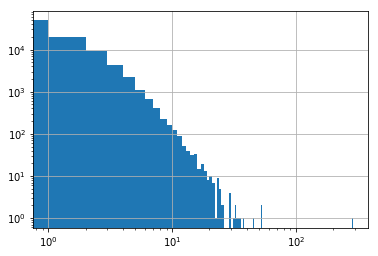

In [66]:
data_clean.num_qs.hist(bins=286)
plt.yscale('log')
plt.xscale('log')

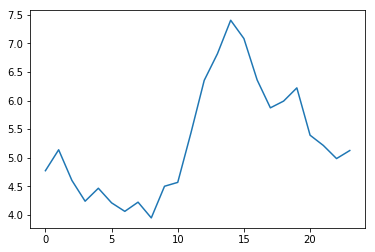

In [49]:
plt.plot(data_clean.groupby('created_hour')['num_comments'].mean())

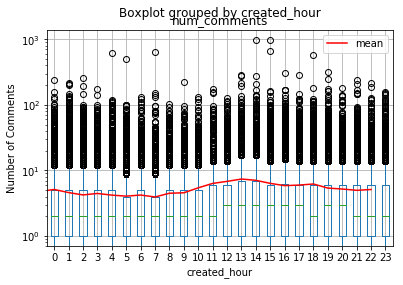

In [58]:
data_clean.boxplot('num_comments', by='created_hour')
plt.yscale('log')
plt.ylabel('Number of Comments')
line_handle = plt.plot(data_clean.groupby('created_hour')['num_comments'].mean(), color='red')
plt.legend(line_handle, ['mean'])

# NLP pre-processing

Create the corpus from the text post.  Limit to 20,000 to make processing easier.

In [65]:
print(len(data_clean))
data_clean = data_clean[:20000]

80523


In [66]:
posts = list(data_clean.selftext)

In [67]:
from nltk.tokenize import WordPunctTokenizer
word_punct_tokenizer = WordPunctTokenizer()
word_punct_tokenizer.tokenize("This’s a test.")

['This', '’', 's', 'a', 'test', '.']

In [68]:
posts_tokenized = []
for post in posts :
    words = word_punct_tokenizer.tokenize(post)
    posts_tokenized.append([w.lower() for w in words])
    #print(posts_tokenized[-1][:20])

In [69]:
from gensim import corpora, models, similarities

# dictionary expects a list of tokenized words
post_dictionary = corpora.Dictionary(posts_tokenized)
post_dictionary.save('Posts_dictionary')  # store the dictionary, for future reference
print(post_dictionary)

Dictionary(39975 unique tokens: ['i', 'can', "'", 't', 'think']...)


In [70]:
posts_vec = [post_dictionary.doc2bow(post) for post in posts_tokenized]

In [71]:
print(posts_vec[0])

[(0, 19), (1, 7), (2, 15), (3, 7), (4, 2), (5, 1), (6, 5), (7, 1), (8, 2), (9, 2), (10, 2), (11, 2), (12, 1), (13, 6), (14, 3), (15, 1), (16, 1), (17, 1), (18, 10), (19, 1), (20, 1), (21, 2), (22, 3), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 4), (33, 1), (34, 3), (35, 3), (36, 2), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 3), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 5), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 2), (59, 3), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)]


Now with this transformation in hand, what are the 10 most informative words in the first post?

In [72]:
tfidf = models.TfidfModel(posts_vec, dictionary=post_dictionary)
tfidf_temp = tfidf[posts_vec[1]]
tfidf_temp.sort(key=lambda x: x[1], reverse=True)
                   
for (x, (key, val)) in enumerate(tfidf_temp[:10]) :
    print('{} {}: {:.3f}'.format(x, post_dictionary[key], val))

0 her: 0.324
1 painful: 0.261
2 smart: 0.226
3 adventurous: 0.223
4 love: 0.211
5 essays: 0.196
6 lover: 0.188
7 athletic: 0.185
8 handsome: 0.175
9 gift: 0.161


In [73]:
posts_words = []
for post in posts_vec :
    tfidf_temp = tfidf[post]
    tfidf_temp.sort(key=lambda x: x[1], reverse=True)
    top_words = []
    for (key, val) in tfidf_temp[:10] :
        #print('{}'.format(post_dictionary[key]), end=', ')
        top_words.append(post_dictionary[key])
    posts_words.append(top_words)

In [74]:
col_labels = ['word_{}'.format(x) for x in range(10)]
data_clean.join(pd.DataFrame(posts_words, columns=col_labels))

,num_comments,selftext,title,created_dayofweek,created_hour,created_month,created_year,post_char_len,post_num_qs,title_char_len,...,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9
0,0,"I can't think straight, I can't concentrate, I...",I feel like my brain doesn't work anymore.,4,14,2,2014,747,1,42,...,semester,community,brain,college,iq,screwing,fails,verge,damage,dropping
1,0,There is this amazing girl that i've known sin...,She's the girl i was always looking for... But...,4,14,2,2014,789,5,72,...,her,painful,smart,adventurous,love,essays,lover,athletic,handsome,gift
2,1,I've been struggling with depression since hig...,I don't have anyone and I don't know why,4,14,2,2014,771,0,40,...,sticks,hang,friends,close,girl,friendship,biggest,besides,senior,easily
3,0,i burn myself..... i heat up a knife and hold ...,how often do you guys inflict self harm?,4,13,2,2014,337,1,40,...,sizzling,.........,conceal,thighs,heat,nine,burn,tunnel,.....,endless
4,0,I’m scared\n Of myself\n ...,All I do is hide,4,12,2,2014,671,0,16,...,hide,’,darkness,healing,fly,destroying,pain,numbness,comforting,feelings
5,3,"I do. \nMy life is almost perfect. I'm 21, and...",Does anyone ever feel selfish?,4,11,2,2014,729,0,30,...,gadgets,nothingness,nice,lovely,passionate,surrounded,expensive,subject,area,badly
6,3,,This day hasn't even started and I'm already c...,4,10,2,2014,0,0,67,...,None,None,None,None,None,None,None,None,None,None
7,1,"I'm sitting here, at 5:22 AM before i need to ...",I wish i had some of the things that the peopl...,4,10,2,2014,2395,0,58,...,dated,temp,kicked,paycheck,clinicial,constants,bus,car,job,three
8,1,Its been fifteen years since I've done this to...,I started cutting myself again and I don't kno...,4,10,2,2014,146,1,52,...,thirty,fifteen,cuts,fresh,arm,man,its,almost,done,old
9,0,"Forgive me if this post is written poorly, or ...",Need to try to express my story.,4,10,2,2014,6343,0,32,...,ministry,faith,religion,devoted,shattered,church,begin,as,reconnect,deeply


Stemming test.

In [75]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
test_sent = 'I haven''t to go up the mountains before coming home'.split(' ') + ['.']
print(test_sent)
results = [stemmer.stem(w) for w in test_sent]
print(results)

['I', 'havent', 'to', 'go', 'up', 'the', 'mountains', 'before', 'coming', 'home', '.']
['i', 'havent', 'to', 'go', 'up', 'the', 'mountain', 'before', 'come', 'home', '.']


See about reducing the number of words by stemming, removing stopwords, and filtering out punctuation.

In [76]:
temp = list(data_clean.selftext[:2])
temp

["I can't think straight, I can't concentrate, I feel like I have brain damage and my IQ is dropping. I forget everything in a second; tell me your name and a minute later it's gone. \n\nI'm in college, and that's a joke; I failed most of my classes last semester, and I'm on the verge of failing the 2 I'm taking this semester. I decided to go to school only half time this semester, and I can't even do that. And it's only community college - who fails community college? I want to drop out. \n\nI can't do this anymore. I can't even have conversations with people anymore because I can't think of anything to say. I've been screwing up at work because I keep missing simple things. I don't know what to do. It's like I can feel my brain wasting away.",
 "There is this amazing girl that i've known since 2012. She was the girl I was looking for. She's very  athletic, smart, beautiful, kind, adventurous, and funny. I love her, i miss her within 10 seconds, and if I do not see her, I feel like my

In [77]:
from nltk.tokenize import WordPunctTokenizer
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
 
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
word_punct_tokenizer = WordPunctTokenizer()
stemmer = SnowballStemmer("english", ignore_stopwords=True)
texts_tokenized = []
for post in temp :
    words = word_punct_tokenizer.tokenize(post)
    words = [w for w in words if (w not in stop_words)]
    texts_tokenized.append([stemmer.stem(w.lower()) for w in words if not all(c in punctuation for c in w)])
print(texts_tokenized)
print([len(text) for text in texts_tokenized])
print([len(word_punct_tokenizer.tokenize(post)) for post in temp])
print(83/191, 94/206)

[['i', 'think', 'straight', 'i', 'concentr', 'i', 'feel', 'like', 'i', 'brain', 'damag', 'iq', 'drop', 'i', 'forget', 'everyth', 'second', 'tell', 'name', 'minut', 'later', 'gone', 'i', 'colleg', 'joke', 'i', 'fail', 'class', 'last', 'semest', 'i', 'verg', 'fail', '2', 'i', 'take', 'semest', 'i', 'decid', 'go', 'school', 'half', 'time', 'semest', 'i', 'even', 'and', 'communiti', 'colleg', 'fail', 'communiti', 'colleg', 'i', 'want', 'drop', 'i', 'anymor', 'i', 'even', 'convers', 'peopl', 'anymor', 'i', 'think', 'anyth', 'say', 'i', 'screw', 'work', 'i', 'keep', 'miss', 'simpl', 'thing', 'i', 'know', 'it', 'like', 'i', 'feel', 'brain', 'wast', 'away'], ['there', 'amaz', 'girl', 'known', 'sinc', '2012', 'she', 'girl', 'i', 'look', 'she', 'athlet', 'smart', 'beauti', 'kind', 'adventur', 'funni', 'i', 'love', 'miss', 'within', '10', 'second', 'i', 'see', 'i', 'feel', 'like', 'whole', 'day', 'wast', 'i', 'tri', 'everyth', 'make', 'love', 'back', 'luck', 'part', 'want', 'get', 'rid', 'alreadi

In [78]:
test = 'can''t'
not all(j in string.punctuation for j in test)

True

That's reduced the number of words in each post by about 55%.

In [81]:
corpus_dictionary = corpora.Dictionary(texts_tokenized)
print(corpus_dictionary)

Dictionary(103 unique tokens: ['i', 'think', 'straight', 'concentr', 'feel']...)


Bundle this all into one function.

In [82]:
from gensim import corpora, models, similarities

def CreateCorpus(raw_text) :
    """ Create a corpus from an array of documents (each document
        a string).  It expects it as a python object, not a pandas
        one.  Returns an array of tokenized texts and the corpus dictionary.
    """
    from gensim import corpora, models, similarities
    from nltk.tokenize import WordPunctTokenizer
    import string
    from nltk.stem.snowball import SnowballStemmer
    from nltk.corpus import stopwords

    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    word_punct_tokenizer = WordPunctTokenizer()
    stemmer = SnowballStemmer("english", ignore_stopwords=True)
    
    texts_proc = []
    for text in raw_text :
        words = word_punct_tokenizer.tokenize(text)
        words = [w for w in words if (w not in stop_words)]
        texts_proc.append([stemmer.stem(w.lower()) for w in words 
                                if not all(c in punctuation for c in w)])
        
    # create dictionary
    corpus_dictionary = corpora.Dictionary(texts_proc)
    corpus_dictionary.filter_extremes(no_below=3, no_above=0.5)
    print(corpus_dictionary)
    
    return texts_proc, corpus_dictionary

In [91]:
# takes ~5 minutes to run
(posts_tokenized, post_dictionary) = CreateCorpus(list(data_clean.selftext)+list(data_clean.title))

Dictionary(11171 unique tokens: ['think', 'straight', 'concentr', 'feel', 'like']...)


In [93]:
post_dictionary.get(9924)

'leftov'

In [95]:
len(posts_tokenized), len(data_clean.selftext)

(40000, 20000)

In [94]:
print(' '.join(posts_tokenized[0]))

i think straight i concentr i feel like i brain damag iq drop i forget everyth second tell name minut later gone i colleg joke i fail class last semest i verg fail 2 i take semest i decid go school half time semest i even and communiti colleg fail communiti colleg i want drop i anymor i even convers peopl anymor i think anyth say i screw work i keep miss simpl thing i know it like i feel brain wast away


Previously (with stop words, no stemming, and extra punctuation), dictionary had 80k terms.  With all that filtering, it now has 20k terms.

And here's the new method to extract the most important features.

In [99]:
text_vec = [post_dictionary.doc2bow(post) for post in posts_tokenized]
tfidf = models.TfidfModel(text_vec, dictionary=post_dictionary)
print(tfidf)

TfidfModel(num_docs=40000, num_nnz=1858350)


In [103]:
print(text_vec[10002])

[(3, 1), (4, 1), (9, 1), (25, 1), (27, 2), (34, 3), (35, 1), (45, 1), (49, 1), (75, 2), (157, 1), (172, 2), (202, 1), (215, 1), (232, 1), (239, 1), (492, 1), (518, 1), (861, 1), (896, 1), (918, 1), (1549, 1), (1970, 1), (2188, 1), (2477, 1)]


In [104]:
tfidf_avg = {}
i = 0
for text in text_vec :
    tfidf_temp = tfidf[text]
    i += 1
    for (key, val) in tfidf_temp :
        #print(key, val)
        if key in tfidf_avg :
            tfidf_avg[key] += val
        else :
            tfidf_avg[key] = val
            
print(len(tfidf_avg))
print(i)
# convert to list and divide by text size
corpus_size = len(text_vec)
tfidf_avg = [(k, v/corpus_size) for k, v in tfidf_avg.items()]
tfidf_avg = sorted(tfidf_avg, key=lambda x: x[1], reverse=True)

11171
40000


Now spin this off into a function.

In [171]:
len(text_vec)

40000

In [172]:
def FindTopTfidfWords(corpus, tfidf) :
    """ Given a vectorized corpus and a tfidf model, find which words are most
        common in the corpus.  Note that the dictionary is likely defined to 
        exclude all words that appear in more than X% of documents. 
    """
    words_cum = {}
    i = 0
    for text in corpus :
        if len(text) > 0 :
            tfidf_temp = tfidf[text]
            i += 1
            for (key, val) in tfidf_temp :
                #print(key, val)
                if key in tfidf_avg :
                    words_cum[key] += val
                else :
                    words_cum[key] = val

    corpus_len = len(corpus)
    for (k, v) in words_cum.items() :
        words_cum[k] /= corpus_len
    return words_cum
    
post_top_words = FindTopTfidfWords(text_vec[:20000], tfidf)
title_top_words = FindTopTfidfWords(text_vec[20000:], tfidf)
print(len(post_top_words), len(title_top_words))

11168


In [173]:
print(len(post_top_words), len(title_top_words))

11168 4877


In [175]:
for (x, (k,v)) in zip(range(10), title_top_words.items()) :
     print(k, v)

3 6.608892542388349e-06
4 7.475205150845526e-06
5 2.3142104412560764e-05
35 5e-05
41 8.254764935423562e-06
52 1.853615509344819e-05
56 2.6431689454748187e-05
57 1.486833242595038e-05
64 1.9814263628250608e-05
72 2.4458351927348356e-05


In [176]:
def GetTopNWords(top_words_dict, N) :
    "from the average tfidf dictionary, return a list with the top tfidf words"
    return sorted([[k, v] for (k,v) in top_words_dict.items()], key=lambda x: x[1], reverse=True)[:N]

def ShowTopNWords(top_words_list, corpus_dict, N) :
    "Show the top N words in human readable form, replacing keys with strings"
    results = []
    for word in top_words_list[:N] :
        results.append((corpus_dict[word[0]], word[1]))
    return results

In [178]:
GetTopNWords(post_top_words, 10)

[[6256, 5e-05],
 [7327, 5e-05],
 [6500, 4.8788793761320535e-05],
 [9626, 4.271897799965181e-05],
 [5746, 3.997885942425169e-05],
 [6151, 3.918083625204276e-05],
 [7202, 3.794572931095072e-05],
 [8011, 3.7254111798902756e-05],
 [7972, 3.659880657628257e-05],
 [4001, 3.6320550352913597e-05]]

In [332]:
num_words_to_keep = 100
title_topN_words = GetTopNWords(title_top_words, num_words_to_keep)
results1 = ShowTopNWords(title_topN_words, post_dictionary, num_words_to_keep)
post_topN_words = GetTopNWords(post_top_words, num_words_to_keep)
results2 = ShowTopNWords(post_topN_words, post_dictionary, num_words_to_keep)
for (x, y) in enumerate(results1[:20]) :
    print('{}\t{}'.format(y, results2[x]))

('anymor', 5e-05)	('mop', 5e-05)
('even', 5e-05)	('gibberish', 5e-05)
('sick', 5e-05)	('•', 4.8788793761320535e-05)
('email', 5e-05)	('bryan', 4.271897799965181e-05)
('stuff', 5e-05)	('richard', 3.997885942425169e-05)
('fed', 5e-05)	('codepend', 3.918083625204276e-05)
('upset', 5e-05)	('comrad', 3.794572931095072e-05)
('bleak', 5e-05)	('dosen', 3.7254111798902756e-05)
('comic', 5e-05)	('pointer', 3.659880657628257e-05)
('hurt', 5e-05)	('bane', 3.6320550352913597e-05)
('comfort', 5e-05)	('hting', 3.5425004804798995e-05)
('because', 5e-05)	('attaqu', 3.4962334329760425e-05)
('analog', 5e-05)	('lookin', 3.486185931579004e-05)
('bore', 5e-05)	('dang', 3.4550853143232505e-05)
('abort', 5e-05)	('knowdepress', 3.442468843743957e-05)
('pointless', 5e-05)	('tiff', 3.428532871244553e-05)
('que', 5e-05)	('nih', 3.4009912757060004e-05)
('blah', 5e-05)	('modafinil', 3.378892562554156e-05)
('weigh', 5e-05)	('eveyth', 3.374622593694307e-05)
('run', 5e-05)	('billi', 3.3488920257016405e-05)


Does every post have a non-zero vector?

In [313]:
tfidf_avg[:5]

[(32, 0.02155958083645766),
 (106, 0.01978423859003115),
 (207, 0.01915988140070573),
 (25, 0.019146203640080958),
 (168, 0.01836327982854844)]

OK, this is now ready for featurizing.

In [315]:
post_dictionary.save(open('Posts_dictionary.p', 'wb'))
print(post_dictionary)

Dictionary(19924 unique tokens: ['think', 'straight', 'concentr', 'brain', 'damag']...)


For some reason, loading a dictionary doesn't work.  Neither does writing as text file.

In [341]:
post_dictionary.load('Posts_dictionary.p')
print(post_dictionary)

Dictionary(100 unique tokens: ['think', 'everyth', 'tell', 'last', 'take']...)


But merging with another dictionary does.

In [230]:
from gensim import corpora, models, similarities
#del title_dict, post_dict
title_dict = corpora.Dictionary()
title_dict.merge_with(post_dictionary)
post_dict = corpora.Dictionary()
post_dict.merge_with(post_dictionary)
print(title_dict)
print(post_dict)
print(post_dictionary)

Dictionary(11171 unique tokens: ['think', 'straight', 'concentr', 'feel', 'like']...)
Dictionary(11171 unique tokens: ['think', 'straight', 'concentr', 'feel', 'like']...)
Dictionary(11171 unique tokens: ['think', 'straight', 'concentr', 'feel', 'like']...)


In [231]:
num_words_to_keep = 100

title_dict.filter_tokens(good_ids = [word_id for (word_id, tfidf) 
                                          in title_topN_words[:num_words_to_keep]])
post_dict.filter_tokens(good_ids = [word_id for (word_id, tfidf) 
                                          in post_topN_words[:num_words_to_keep]])
print(title_dict, '\n', post_dict)

Dictionary(100 unique tokens: ['even', 'anymor', 'comfort', 'sick', 'run']...) 
 Dictionary(100 unique tokens: ['essay', 'ahead', 'https', 'pancreat', 'overstay']...)


In [232]:
i = 0
for text in text_vec[20000:] :
    if len(text) > 0 :
        tfidf_temp = tfidf[text]
        tfidf_temp_vals = [tfidf for (word_id, tfidf) in tfidf_temp]
        if sum(tfidf_temp_vals) == 0 :
            i += 1
print('Number of non-empty records without any top100', i)
       

Number of non-empty records without any top100 0


Randomly add another feature here, but might actually want the total number of words in the post, which should be about 55% larger.

In [214]:
data_clean.post_word_len = [len(post) for post in posts_tokenized[:20000]]
data_clean.title_word_len = [len(post) for post in posts_tokenized[20000:]]

In [236]:
post_vec_short = [post_dict.doc2bow(text) for text in posts_tokenized[:20000]]
post_tfidf = models.TfidfModel(post_vec_short, dictionary=post_dict)
print(post_tfidf)
title_vec_short = [title_dict.doc2bow(text) for text in posts_tokenized[20000:]]
title_tfidf = models.TfidfModel(title_vec_short, dictionary=title_dict)
print(title_tfidf)

TfidfModel(num_docs=40000, num_nnz=1858350)
TfidfModel(num_docs=40000, num_nnz=1858350)


In [238]:
print(tfidf)

TfidfModel(num_docs=40000, num_nnz=1858350)


In [319]:
def ComputeDocumentTfidfs(documents, tfidf, N, label_base = 'word') : 
    baseline = [0 for x in range(N)]
    col_labels = ['{}_{}'.format(label_base, x) for x in range(N)]
    new_features = pd.DataFrame([], columns=col_labels)
    for (x, text) in enumerate(documents) :
        tfidf_temp = tfidf[text]
        text_features = baseline.copy()
        for (k, v) in tfidf_temp :
            text_features[k] = v
        new_features.loc[x] = text_features
    return new_features

# this takes about 27 s for 10k, 76 s for 20k, 152 s for 30k, 240 s for 40k...call that good for now
# this takes 243 s for 20 k
import time
start_time = time.time()

post_features = ComputeDocumentTfidfs(post_vec_short, post_tfidf, num_words_to_keep, label_base = 'pword')
title_features = ComputeDocumentTfidfs(title_vec_short, title_tfidf, num_words_to_keep, label_base = 'tword')

print("--- %s seconds ---" % (time.time() - start_time))  
post_features.head()

--- 314.3612575531006 seconds ---


,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_90,word_91,word_92,word_93,word_94,word_95,word_96,word_97,word_98,word_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
post_features.describe()

,pword_0,pword_1,pword_2,pword_3,pword_4,pword_5,pword_6,pword_7,pword_8,pword_9,...,pword_90,pword_91,pword_92,pword_93,pword_94,pword_95,pword_96,pword_97,pword_98,pword_99
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
unique,14.0,23.0,8.0,3.0,2.0,4.0,2.0,23.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,19929.0,19730.0,19916.0,19993.0,19996.0,19993.0,19995.0,19769.0,19989.0,19991.0,...,19997.0,19997.0,19997.0,19996.0,19998.0,19997.0,19997.0,19996.0,19998.0,19997.0


In [322]:
temp = title_features.sum(axis=0)
temp[temp==0.00]

Series([], dtype: float64)

OK, so at least every post has one top word in it.

In [334]:
data_clean2 = data_clean.join(title_features)
data_clean2 = data_clean2.join(post_features)
#data_clean2 = data_clean2[:40000]
data_clean2 = data_clean2.drop(['selftext', 'title'], axis=1)
data_clean2.head()

,num_comments,created_dayofweek,created_hour,created_month,created_year,post_char_len,post_num_qs,title_char_len,title_num_qs,post_num_punc,...,pword_90,pword_91,pword_92,pword_93,pword_94,pword_95,pword_96,pword_97,pword_98,pword_99
0,0,4,14,2,2014,747,1,42,0,34,...,0,0,0,0,0,0,0,0,0,0
1,0,4,14,2,2014,789,5,72,0,43,...,0,0,0,0,0,0,0,0,0,0
2,1,4,14,2,2014,771,0,40,0,25,...,0,0,0,0,0,0,0,0,0,0
3,0,4,13,2,2014,337,1,40,1,19,...,0,0,0,0,0,0,0,0,0,0
4,0,4,12,2,2014,671,0,16,0,0,...,0,0,0,0,0,0,0,0,0,0


One example for the week 2 demo.

In [448]:
tfidf_temp = tfidf_short[text_vec_short[0]]
tfidf_temp = sorted(tfidf_temp, key=lambda x: x[1], reverse=True)
for (x, (k,v)) in enumerate(tfidf_temp) :
    print('{} {}: {:.2f}'.format(x, post_dictionary[k], v))

0 anymor: 0.49
1 even: 0.27
2 think: 0.27
3 and: 0.25
4 away: 0.24
5 keep: 0.24
6 tell: 0.22
7 school: 0.22
8 last: 0.22
9 everyth: 0.22
10 say: 0.20
11 take: 0.20
12 anyth: 0.18
13 work: 0.18
14 it: 0.15
15 peopl: 0.15
16 thing: 0.13
17 time: 0.11
18 want: 0.10
19 go: 0.10


# Model

Start with a random forest.

In [432]:
from sklearn import ensemble, linear_model

class BuildModel() :
    
    def __init__(self, data_x, data_y, model_type = 'randomforest', test_frac = 0.2) :
        from sklearn import ensemble, linear_model
        from sklearn.model_selection import train_test_split
        from sklearn.svm import SVR
        
        (self.train_x, self.test_x, self.train_y, self.test_y) = train_test_split(
                    data_x, data_y, test_size = test_frac)
        print(self.train_x.shape, self.test_x.shape, self.train_y.shape, self.test_y.shape)
        
        if model_type == 'randomforest' :
            self.model = ensemble.RandomForestRegressor()
        elif model_type == 'gradientboostingregressor' :
            self.model = ensemble.GradientBoostingRegressor()
        elif model_type == 'linearregression' :
            self.model = linear_model.LinearRegression()
        elif model_type == 'svm' :
            self.model = SVR(kernel='rbf', C=1e3, gamma=0.1)
        else :
            print('Model type {} is not defined'.format(model_type))
            return
            
        self.model.fit(self.train_x, self.train_y)
        return
    
    
    def predict(self, log_flag = False) :
        import numpy as np
        self.prediction = self.model.predict(self.test_x)
        
        if log_flag :
            # The mean squared error
            print("Mean squared error: %.2f"
                  % np.mean(10**(self.prediction - self.test_y)))

            # Explained variance score: 1 is perfect prediction
            print('Variance score: %.2f' % self.model.score(self.test_x, self.test_y))            
        else :
            # The mean squared error
            print("Mean squared error: %.2f"
                  % np.mean(self.prediction - self.test_y))

            # Explained variance score: 1 is perfect prediction
            print('Variance score: %.2f' % self.model.score(self.test_x, self.test_y))

In [348]:
data_clean2.post_perc_punc = data_clean2.post_perc_punc.fillna(0)
model1 = BuildModel(data_clean2.drop('num_comments', axis=1), data_clean2.num_comments)

(16000, 212) (4000, 212) (16000,) (4000,)


In [349]:
model1.predict()

Mean squared error: 0.67
Variance score: -0.18


This is a pretty bad model, only predicting the mean.  Try transforming num_comments.

In [337]:
import numpy as np
data_clean3 = data_clean2.copy()
data_clean3['log_num_comments'] = data_clean3.num_comments.apply(lambda x: np.log10(x+0.1))
data_clean3 = data_clean3.drop('num_comments', axis=1)
data_clean3.describe()

,created_dayofweek,created_hour,created_month,created_year,post_char_len,post_num_qs,title_char_len,title_num_qs,post_num_punc,title_num_punc,...,tword_91,tword_92,tword_93,tword_94,tword_95,tword_96,tword_97,tword_98,tword_99,log_num_comments
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.840300,10.685050,7.651700,2013.350350,1354.130600,0.941250,45.770900,0.220800,43.959900,43.959900,...,0.000050,0.0001,0.000191,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.198114
std,2.021633,7.579177,4.717966,0.477091,1645.422134,1.812502,32.888696,0.447836,57.224591,57.224591,...,0.007071,0.0100,0.013535,0.007071,0.007071,0.007071,0.007071,0.007071,0.007071,0.707369
min,0.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,4.000000,2.000000,2013.000000,405.000000,0.000000,24.000000,0.000000,13.000000,13.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041393
50%,3.000000,9.000000,10.000000,2013.000000,884.000000,0.000000,37.000000,0.000000,29.000000,29.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322219
75%,5.000000,18.000000,11.000000,2014.000000,1707.000000,1.000000,58.000000,0.000000,55.000000,55.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707570
max,6.000000,23.000000,12.000000,2014.000000,37659.000000,60.000000,300.000000,4.000000,3145.000000,3145.000000,...,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.491502


In [338]:
#df.isnull().sum().sum()
data_clean3.isnull().sum()
data_clean3.post_perc_punc = data_clean3.post_perc_punc.fillna(0)
data_clean3.isnull().sum().sum()

0

The following model is built with only the post words, none from the title.

In [295]:
model2 = BuildModel(data_clean3.drop('log_num_comments', axis=1), data_clean3.log_num_comments, 
                   model_type = 'randomforest')
model2.predict(log_flag=True)

(16000, 112) (4000, 112) (16000,) (4000,)
Mean squared error: -0.01
Variance score: -0.09


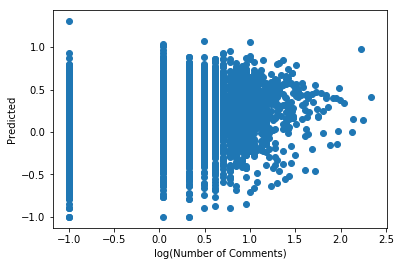

In [304]:
plt.scatter(model2.test_y, model2.model.predict(model2.test_x))
plt.xlabel('log(Number of Comments)')
plt.ylabel('Predicted')

In [316]:
from sklearn.metrics import mutual_info_score
mutual_info = []
for col in data_clean3 :
    mutual_info.append((col, mutual_info_score(data_clean3.log_num_comments, data_clean3[col])))
mutual_info = sorted(mutual_info, key=lambda x: x[1], reverse=True)
mutual_info

[('log_num_comments', 2.4554050200452053),
 ('post_perc_punc', 1.7900698212779493),
 ('title_perc_punc', 1.1213757995502058),
 ('post_char_len', 1.0486205784780807),
 ('post_num_punc', 0.1917139784852176),
 ('title_num_punc', 0.1917139784852176),
 ('title_char_len', 0.16940404011145935),
 ('created_hour', 0.048301694718454545),
 ('post_num_qs', 0.019495377467062924),
 ('created_dayofweek', 0.015820069561728965),
 ('created_month', 0.0137422775530644),
 ('title_num_qs', 0.011308706677264751),
 ('created_year', 0.0051710454869583842),
 ('word_1', 0.0045719105632195311),
 ('word_7', 0.0038880630627679334),
 ('word_13', 0.0030925457184513929),
 ('word_11', 0.0020268371440701205),
 ('word_0', 0.0018660492963407597),
 ('word_34', 0.0014393971544209253),
 ('word_36', 0.0012710005558844344),
 ('word_2', 0.001226723564076871),
 ('word_24', 0.0011617833275191164),
 ('word_21', 0.0010242451038715429),
 ('word_60', 0.00098191588759703697),
 ('word_15', 0.00098146935497763431),
 ('word_10', 0.00095

In [318]:
best_features = model2.model.feature_importances_
best_features_ranked = [(data_clean3.columns[x], y) for (x, y) in enumerate(best_features)]
best_features_ranked = sorted(best_features_ranked, key=lambda x: x[1], reverse=True)
best_features_ranked

[('post_perc_punc', 0.17537109561478564),
 ('title_perc_punc', 0.14658502004048923),
 ('title_char_len', 0.14154625254239497),
 ('post_char_len', 0.12928272725653805),
 ('created_hour', 0.10634085092872661),
 ('created_dayofweek', 0.074599441836952399),
 ('created_month', 0.046302307261022982),
 ('title_num_punc', 0.045463899568462855),
 ('post_num_punc', 0.044157028010576173),
 ('post_num_qs', 0.042270621680545704),
 ('title_num_qs', 0.013280376357865178),
 ('created_year', 0.0092115444505966992),
 ('word_1', 0.0033574131374282251),
 ('word_7', 0.0033303139845929758),
 ('word_13', 0.0016481994791284493),
 ('word_11', 0.0016171314643275262),
 ('word_2', 0.0015807818178975859),
 ('word_0', 0.0011911083656484744),
 ('word_77', 0.00071420816976957907),
 ('word_21', 0.00068308944493434176),
 ('word_60', 0.00065293110038812754),
 ('word_8', 0.00064420341501098585),
 ('word_12', 0.00057922236720610331),
 ('word_29', 0.00050153894116616263),
 ('word_14', 0.00048330715397173319),
 ('word_23', 

Well, mutual information and the feature importance give pretty similar results about what's important.  The meta data is doing a much better job, however.  Try now with the title words.

In [343]:
model3 = BuildModel(data_clean3.drop('log_num_comments', axis=1), data_clean3.log_num_comments, 
                   model_type = 'randomforest')
model3.predict(log_flag = True)

(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: -2.68
Variance score: -0.10


In [344]:
model3_gbr = BuildModel(data_clean3.drop('log_num_comments', axis=1), data_clean3.log_num_comments, 
                   'gradientboostingregressor')
model3_gbr.predict(log_flag = True)

(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: -2.78
Variance score: 0.04


In [345]:
model3_lr = BuildModel(data_clean3.drop('log_num_comments', axis=1), data_clean3.log_num_comments, 
                   'linearregression')
model3_lr.predict(log_flag = True)

(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: -2.77
Variance score: 0.01


In [350]:
model3_lr = BuildModel(data_clean3.drop('log_num_comments', axis=1), data_clean3.log_num_comments, 
                   'svm')
model3_lr.predict(log_flag = True)

(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: -2.97
Variance score: -0.02


SVM takes much longer to run, on the order of 5-10 minutes.

## Latent Semantic Analysis

This runs PCA on the tfidf vectors to cluster.  Gensim seems to have a good implementation.

In [354]:
print(post_dictionary)

Dictionary(11171 unique tokens: ['think', 'straight', 'concentr', 'feel', 'like']...)


In [423]:
from gensim.models import lsimodel
num_lsi_topics = 100
#text_vec = [post_dictionary.doc2bow(post) for post in posts_tokenized]
post_lsi = lsimodel.LsiModel(text_vec[:20000], num_topics=num_lsi_topics, id2word=post_dictionary)
title_lsi = lsimodel.LsiModel(text_vec[20000:], num_topics=num_lsi_topics, id2word=post_dictionary)

In [424]:
post_lsi[text_vec[0]]

[(0, 3.8283975757825286),
 (1, 0.67113242596102807),
 (2, 1.472057293575719),
 (3, -0.29286125219733422),
 (4, -0.17221986510435583),
 (5, 0.26345193075863838),
 (6, 1.0233766706296166),
 (7, 0.90921828050868148),
 (8, -0.19485120088459321),
 (9, 0.21339762006034915),
 (10, -1.1874993103126175),
 (11, -0.18091860920498121),
 (12, -0.85129246627978994),
 (13, -0.54040899272647591),
 (14, -0.15767924330210861),
 (15, 0.49929518587577193),
 (16, -0.60560231655390706),
 (17, -0.69587794682756265),
 (18, -1.1157666841112208),
 (19, -0.30287238186003562),
 (20, 0.99779254426487574),
 (21, 0.20029400035100195),
 (22, 0.91582754062873906),
 (23, 0.15405898471017312),
 (24, -1.027681850767191),
 (25, 1.0080437233368664),
 (26, 0.29678721392196467),
 (27, 0.33240606759772312),
 (28, -0.31435347563005428),
 (29, 0.12919623558771914),
 (30, -0.29291229937649976),
 (31, 0.530839962178969),
 (32, 0.33062806560469465),
 (33, -0.25828095973785692),
 (34, 0.037926417469143353),
 (35, 0.1838576940820894

In [407]:
len(text_vec[6])

0

In [425]:
def ComputeDocumentLSIs(documents, lsi, N, label_base = 'lsi') : 
    " Compute the LSI representation of every document in the corpus"
    baseline = [0 for x in range(N)]
    col_labels = ['{}_{}'.format(label_base, x) for x in range(N)]
    new_features = pd.DataFrame([], columns=col_labels)
    for (x, text) in enumerate(documents) :
        if len(text) > 0:
            lsi_temp = lsi[text]
            temp = [y for (z,y) in lsi_temp]
            new_features.loc[x] = temp
        else :
            new_features.loc[x] = baseline
    return new_features

# this takes 85 s for 20 k and 20 topics, 154 s for 20k and 100 topics
import time
start_time = time.time()

post_lsi_features = ComputeDocumentLSIs(text_vec[:20000], post_lsi, num_lsi_topics, label_base = 'post_lsi')
title_lsi_features = ComputeDocumentTfidfs(text_vec[20000:], title_lsi, num_lsi_topics, label_base = 'title_lsi')

print("--- %s seconds ---" % (time.time() - start_time))  
post_lsi_features.head()

--- 154.34856414794922 seconds ---


,post_lsi_0,post_lsi_1,post_lsi_2,post_lsi_3,post_lsi_4,post_lsi_5,post_lsi_6,post_lsi_7,post_lsi_8,post_lsi_9,...,post_lsi_90,post_lsi_91,post_lsi_92,post_lsi_93,post_lsi_94,post_lsi_95,post_lsi_96,post_lsi_97,post_lsi_98,post_lsi_99
0,3.828398,0.671132,1.472057,-0.292861,-0.172220,0.263452,1.023377,0.909218,-0.194851,0.213398,...,0.989412,1.081122,-0.734183,0.223950,-0.555080,-0.858062,-0.156960,-0.484857,-0.161866,-0.233983
1,4.361784,0.553801,1.472782,1.985654,-1.010548,0.767797,-2.314425,-0.304167,-0.928306,1.401782,...,0.471161,0.402512,0.548648,-0.405724,-0.043315,0.198354,-0.553880,0.324514,-0.529835,0.439882
2,4.853951,0.836469,-1.039130,-0.495592,-2.007934,3.688082,-0.628368,0.656404,2.218985,-3.987491,...,-0.588072,-0.342747,0.440150,-0.065631,0.116086,-0.881538,-0.057593,-0.469983,0.345259,-0.394699
3,0.787195,0.143598,0.022357,0.030370,0.382595,-0.512656,-0.200467,-0.444780,0.421183,-0.216337,...,0.031600,-0.299671,-0.274795,0.171642,-0.231321,-0.003927,-0.242240,0.095749,0.171106,-0.032181
4,5.427143,-2.057718,6.871058,2.874641,0.253512,1.415790,-3.329614,0.267013,-5.165120,0.060627,...,-0.391336,0.120092,0.203277,0.210822,0.350835,-0.107928,0.291055,-0.704056,-0.378054,-0.088428


Now create the new feature vector.

In [419]:
data_clean4 = data_clean.join(post_lsi_features)
data_clean4 = data_clean4.join(title_lsi_features)
data_clean4 = data_clean4.drop(['selftext', 'title'], axis=1)
data_clean4.post_perc_punc = data_clean4.post_perc_punc.fillna(0)
print('Number of NaNs = {}'.format(data_clean4.isnull().sum().sum()))
data_clean4.head()

Number of NaNs = 0


,num_comments,created_dayofweek,created_hour,created_month,created_year,post_char_len,post_num_qs,title_char_len,title_num_qs,post_num_punc,...,title_lsi_10,title_lsi_11,title_lsi_12,title_lsi_13,title_lsi_14,title_lsi_15,title_lsi_16,title_lsi_17,title_lsi_18,title_lsi_19
0,0,4,14,2,2014,747,1,42,0,34,...,0.359273,0.134601,-0.104671,0.000178,0.010869,0.119079,-0.008561,-0.048621,0.038566,0.011676
1,0,4,14,2,2014,789,5,72,0,43,...,0.043678,-0.016885,0.027034,-0.071303,-0.026664,0.016343,0.020585,0.052902,0.014964,0.092633
2,1,4,14,2,2014,771,0,40,0,25,...,-0.531171,-0.093511,-0.196922,0.154074,0.081106,0.070230,0.126651,-0.009776,0.072346,-0.101926
3,0,4,13,2,2014,337,1,40,1,19,...,-0.002638,-0.005545,-0.008623,-0.061589,-0.010942,0.015018,0.021750,0.007442,-0.006149,0.049550
4,0,4,12,2,2014,671,0,16,0,0,...,-0.000560,-0.003668,-0.005450,-0.004905,0.001186,0.000224,0.002744,0.010571,-0.001349,-0.001315


In [420]:
data_clean5 = data_clean4.copy()
data_clean5['log_num_comments'] = data_clean5.num_comments.apply(lambda x: np.log10(x+0.1))
data_clean5 = data_clean5.drop('num_comments', axis=1)
data_clean5.head()

,created_dayofweek,created_hour,created_month,created_year,post_char_len,post_num_qs,title_char_len,title_num_qs,post_num_punc,title_num_punc,...,title_lsi_11,title_lsi_12,title_lsi_13,title_lsi_14,title_lsi_15,title_lsi_16,title_lsi_17,title_lsi_18,title_lsi_19,log_num_comments
0,4,14,2,2014,747,1,42,0,34,34,...,0.134601,-0.104671,0.000178,0.010869,0.119079,-0.008561,-0.048621,0.038566,0.011676,-1.000000
1,4,14,2,2014,789,5,72,0,43,43,...,-0.016885,0.027034,-0.071303,-0.026664,0.016343,0.020585,0.052902,0.014964,0.092633,-1.000000
2,4,14,2,2014,771,0,40,0,25,25,...,-0.093511,-0.196922,0.154074,0.081106,0.070230,0.126651,-0.009776,0.072346,-0.101926,0.041393
3,4,13,2,2014,337,1,40,1,19,19,...,-0.005545,-0.008623,-0.061589,-0.010942,0.015018,0.021750,0.007442,-0.006149,0.049550,-1.000000
4,4,12,2,2014,671,0,16,0,0,0,...,-0.003668,-0.005450,-0.004905,0.001186,0.000224,0.002744,0.010571,-0.001349,-0.001315,-1.000000


The following model was run with 20 LSA features, using untransformed number of comments.

In [422]:
model_lsi_1 = BuildModel(data_clean4.drop('num_comments', axis=1), data_clean4.num_comments, 
                   model_type = 'randomforest')
model_lsi_1.predict(log_flag = False)

(16000, 52) (4000, 52) (16000,) (4000,)
Mean squared error: 0.74
Variance score: -0.19


The following was run with 20 LSA features, using log-transformed number of comments.

In [421]:
model_lsi_1 = BuildModel(data_clean5.drop('log_num_comments', axis=1), data_clean5.log_num_comments, 
                   model_type = 'randomforest')
model_lsi_1.predict(log_flag = True)

(16000, 52) (4000, 52) (16000,) (4000,)
Mean squared error: -2.52
Variance score: -0.06


In [436]:
def TestModels(train_x, train_y, models_to_test, log_flag = False) :
    "Train model on the models supplied in models_to_test"
    for model in models_to_test :
        model_temp = BuildModel(train_x, train_y, model_type = model)
        print('\n{}'.format(model))
        model_temp.predict(log_flag = log_flag)
    return

Now with 100 LSA features, no log-transform:

In [437]:
models_to_test = ['randomforest', 'linearregression', 
                  'gradientboostingregressor', 'logisticregression']
train_x = data_clean_LSA100.drop('num_comments', axis=1)
train_y = data_clean_LSA100.num_comments
TestModels(train_x, train_y, models_to_test, log_flag=False)

(16000, 212) (4000, 212) (16000,) (4000,)

randomforest
Mean squared error: 0.68
Variance score: -0.09
(16000, 212) (4000, 212) (16000,) (4000,)

linearregression
Mean squared error: -0.16
Variance score: -0.00
(16000, 212) (4000, 212) (16000,) (4000,)

gradientboostingregressor
Mean squared error: 0.21
Variance score: -0.05
(16000, 212) (4000, 212) (16000,) (4000,)

logisticregression
Mean squared error: -3.05
Variance score: 0.24


In [438]:
TestModels(train_x, train_y, models_to_test[:3], log_flag=False)

(16000, 212) (4000, 212) (16000,) (4000,)

randomforest
Mean squared error: 0.78
Variance score: -0.11
(16000, 212) (4000, 212) (16000,) (4000,)

linearregression
Mean squared error: 0.17
Variance score: 0.02
(16000, 212) (4000, 212) (16000,) (4000,)

gradientboostingregressor
Mean squared error: 0.02
Variance score: -0.06


In [427]:
data_clean_LSA100 = data_clean.join(post_lsi_features)
data_clean_LSA100 = data_clean_LSA100.join(title_lsi_features)
data_clean_LSA100 = data_clean_LSA100.drop(['selftext', 'title'], axis=1)
data_clean_LSA100.post_perc_punc = data_clean_LSA100.post_perc_punc.fillna(0)


print('Random Forest')
model_lsi100_1 = BuildModel(train_x, train_y, model_type = 'randomforest')
model_lsi100_1.predict(log_flag = False)

print('\nLinear Regression')
model_lsi100_1 = BuildModel(train_x, train_y, model_type = 'linearregression')
model_lsi100_1.predict(log_flag = False)

print('\nGradientBoostingAlgorithm')
model_lsi100_1 = BuildModel(train_x, train_y, model_type = 'gradientboostingregressor')
model_lsi100_1.predict(log_flag = False)

Random Forest
(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: 1.16
Variance score: -0.36
Linear Regression
(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: -0.09
Variance score: 0.03
GradientBoostingAlgorithm
(16000, 212) (4000, 212) (16000,) (4000,)
Mean squared error: 0.05
Variance score: -0.05


Now with the log transform:

In [439]:
data_clean_LSA100_1 = data_clean_LSA100.copy()
data_clean_LSA100_1['log_num_comments'] = data_clean_LSA100_1.num_comments.apply(lambda x: np.log10(x+0.1))
data_clean_LSA100_1 = data_clean_LSA100_1.drop('num_comments', axis=1)

train_x = data_clean_LSA100_1.drop('log_num_comments', axis=1)
train_y = data_clean_LSA100_1.log_num_comments

TestModels(train_x, train_y, models_to_test, log_flag=True)

(16000, 212) (4000, 212) (16000,) (4000,)

randomforest
Mean squared error: 3.95
Variance score: -0.05
(16000, 212) (4000, 212) (16000,) (4000,)

linearregression
Mean squared error: 3.75
Variance score: 0.04
(16000, 212) (4000, 212) (16000,) (4000,)

gradientboostingregressor
Mean squared error: 3.49
Variance score: 0.06
(16000, 212) (4000, 212) (16000,) (4000,)


ValueError: Unknown label type: 'continuous'

That's weird: the variance goes down when it should be better.

Now, try binning the features.

[   0.    1.    2.    3.    5.    6.   11.  310.]


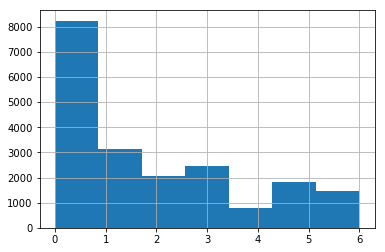

In [516]:
data_binned_1 = data_clean_LSA100.copy()
(categorized, bins) = pd.qcut(data_binned_1.num_comments, 12, 
                duplicates = 'drop', labels = False, retbins = True)
print(bins)
data_binned_1 = data_binned_1.assign(comment_category=categorized)
data_binned_1.describe()
data_binned_1 = data_binned_1.drop('num_comments', axis=1)
data_binned_1.comment_category.hist(bins=len(bins)-1)

In [523]:
from sklearn import ensemble, linear_model

class BuildClassificationModel() :
    
    def __init__(self, data_x, data_y, model_type = 'randomforest', test_frac = 0.2) :
        from sklearn import ensemble, linear_model
        from sklearn.model_selection import train_test_split
        from sklearn.svm import SVC
        
        (self.train_x, self.test_x, self.train_y, self.test_y) = train_test_split(
                    data_x, data_y, test_size = test_frac)
        print(self.train_x.shape, self.test_x.shape, self.train_y.shape, self.test_y.shape)
        
        if model_type == 'randomforest' :
            self.model = ensemble.RandomForestClassifier()
        elif model_type == 'gradientboostingclassifier' :
            self.model = ensemble.GradientBoostingClassifier()
        elif model_type == 'logisticregression' :
            self.model = linear_model.LogisticRegression()
        elif model_type == 'svc' :
            self.model = SVC(kernel='rbf', C=1e3, gamma=0.1)
        else :
            print('Model type "{}" is not defined'.format(model_type))
            return
            
        self.model.fit(self.train_x, self.train_y)
        return
    
    def predict(self) :
        print('Accuracy: %.3f' % self.model.score(self.test_x, self.test_y))            

        
def TestClassificationModels(train_x, train_y, models_to_test, log_flag = False) :
    "Train model on the models supplied in models_to_test"
    for model in models_to_test :
        model_temp = BuildClassificationModel(train_x, train_y, model_type = model)
        print('\n{}'.format(model))
        model_temp.predict()
    return        

In [524]:
models_to_test = ['randomforest', 'gradientboostingclassifier', 'logisticregression',
                 'svc']
train_x = data_binned_1.drop('comment_category', axis=1)
train_y = data_binned_1.comment_category

TestClassificationModels(train_x, train_y, models_to_test)

(16000, 212) (4000, 212) (16000,) (4000,)

randomforest
Accuracy: 0.354
(16000, 212) (4000, 212) (16000,) (4000,)

gradientboostingclassifier
Accuracy: 0.406
(16000, 212) (4000, 212) (16000,) (4000,)

logisticregression
Accuracy: 0.417
(16000, 212) (4000, 212) (16000,) (4000,)

svc
Accuracy: 0.406


In [531]:
data_binned_1.comment_category.value_counts()

0    8235
1    3144
3    2468
2    2079
5    1810
6    1464
4     800
Name: comment_category, dtype: int64

# Create pipeline for webapp

In [532]:
model_binned_1_logreg = BuildClassificationModel(train_x, train_y, 'logisticregression')
model_binned_1_logreg.predict()

(16000, 212) (4000, 212) (16000,) (4000,)
Accuracy: 0.408


In [536]:
import pickle
pickle.dump(model_binned_1_logreg, open('Model_binned_1_logreg_class.p', 'wb'))
pickle.dump(model_binned_1_logreg.model, open('Model_binned_1_logreg_model.p', 'wb'))

In [ ]:
num_lsi_topics
post_lsi_features
title_lsi_features
bins

In [539]:
bins

array([   0.,    1.,    2.,    3.,    5.,    6.,   11.,  310.])

In [544]:
all_columns = sorted(list(data_clean_LSA100.columns))
print(all_columns)

['created_dayofweek', 'created_hour', 'created_month', 'created_year', 'num_comments', 'post_char_len', 'post_lsi_0', 'post_lsi_1', 'post_lsi_10', 'post_lsi_11', 'post_lsi_12', 'post_lsi_13', 'post_lsi_14', 'post_lsi_15', 'post_lsi_16', 'post_lsi_17', 'post_lsi_18', 'post_lsi_19', 'post_lsi_2', 'post_lsi_20', 'post_lsi_21', 'post_lsi_22', 'post_lsi_23', 'post_lsi_24', 'post_lsi_25', 'post_lsi_26', 'post_lsi_27', 'post_lsi_28', 'post_lsi_29', 'post_lsi_3', 'post_lsi_30', 'post_lsi_31', 'post_lsi_32', 'post_lsi_33', 'post_lsi_34', 'post_lsi_35', 'post_lsi_36', 'post_lsi_37', 'post_lsi_38', 'post_lsi_39', 'post_lsi_4', 'post_lsi_40', 'post_lsi_41', 'post_lsi_42', 'post_lsi_43', 'post_lsi_44', 'post_lsi_45', 'post_lsi_46', 'post_lsi_47', 'post_lsi_48', 'post_lsi_49', 'post_lsi_5', 'post_lsi_50', 'post_lsi_51', 'post_lsi_52', 'post_lsi_53', 'post_lsi_54', 'post_lsi_55', 'post_lsi_56', 'post_lsi_57', 'post_lsi_58', 'post_lsi_59', 'post_lsi_6', 'post_lsi_60', 'post_lsi_61', 'post_lsi_62', 'po